In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('glass_dataset.csv')

In [7]:
df.columns = ['Id', 'refractive_index', 'Sodium', 'Magnesium', 'Aluminum', 'Silicon', 'Potassium', 'Calcium', 'Barium', 
           'Iron', 'Type_of_glass']

In [8]:
df.head()

,Id,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [9]:
df.shape

(213, 11)

In [10]:
df.describe()

,Id,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [12]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [17]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

In [18]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf')
classifier.fit(X_train, y_train)

SVC()

In [19]:
y_pred = classifier.predict(X_test)

In [20]:
residuals = y_test - y_pred
residuals.mean()

0.6296296296296297

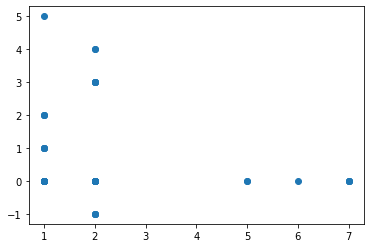

In [21]:
plt.scatter(y_pred, residuals)

In [22]:
act_vs_pred = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted': y_pred.flatten()})

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[17,  4,  0,  0,  0,  0],
       [ 4, 11,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0],
       [ 0,  5,  0,  2,  0,  0],
       [ 1,  2,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  4]], dtype=int64)

In [24]:
accuracy_score(y_test, y_pred)

0.6481481481481481

In [26]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [27]:
accuracies.mean()

0.6799999999999999

In [28]:
accuracies.std()

0.12514991010783827